In [33]:
# load the dataset

import pandas as pd

df = pd.read_csv('AP_ICD_Lipase_CRP_Amylase_Dataset_Comorbid.csv')

In [ ]:

import pandas as pd
df = pd.read_csv('df_clean.csv')

df.head()

df = df

,lipase_level,gender,actual_age,is_confirmed_ap,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,glucose_chemistry,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,severity
0,1222.0,0,64,1,4,20.0,28.0,11.0,9.6,110.0,144.0,143.0,4.5,1.7,302.0,523.0,252.0,333.0,0.250000,4
1,508.0,0,67,1,3,17.0,27.0,9.0,9.6,98.0,102.0,139.0,4.6,0.6,177.0,14.0,138.0,14.0,0.151515,3
2,1164.0,1,64,1,4,22.0,37.0,51.0,8.4,115.0,726.0,148.0,5.7,1.1,43.0,85.0,94.0,55.0,0.435897,0
3,677.0,1,58,1,2,27.0,29.0,82.0,9.6,112.0,371.0,150.0,5.8,5.6,231.0,257.0,719.0,303.0,2.000000,0
4,692.0,1,32,1,0,15.0,34.0,11.0,7.8,108.0,129.0,142.0,4.3,0.8,285.0,91.0,69.0,149.0,0.366667,3


In [5]:
# Filter rows where 'is_confirmed_ap' equals 1
filtered_df = df[df['is_confirmed_ap'] == 1]
filtered_df.head()

,lipase_level,gender,actual_age,is_confirmed_ap,charlson_comorbidity_index,aniongap_chemistry,bicarbonate_chemistry,bun_chemistry,calcium_chemistry,chloride_chemistry,glucose_chemistry,sodium_chemistry,potassium_chemistry,bilirubin_total_enzyme,amylase_enzyme,alt_enzyme,alp_enzyme,ast_enzyme,creatinine_albumin_ratio,severity
0,1222.0,0,64,1,4,20.0,28.0,11.0,9.6,110.0,144.0,143.0,4.5,1.7,302.0,523.0,252.0,333.0,0.250000,4
1,508.0,0,67,1,3,17.0,27.0,9.0,9.6,98.0,102.0,139.0,4.6,0.6,177.0,14.0,138.0,14.0,0.151515,3
2,1164.0,1,64,1,4,22.0,37.0,51.0,8.4,115.0,726.0,148.0,5.7,1.1,43.0,85.0,94.0,55.0,0.435897,0
3,677.0,1,58,1,2,27.0,29.0,82.0,9.6,112.0,371.0,150.0,5.8,5.6,231.0,257.0,719.0,303.0,2.000000,0
4,692.0,1,32,1,0,15.0,34.0,11.0,7.8,108.0,129.0,142.0,4.3,0.8,285.0,91.0,69.0,149.0,0.366667,3


In [35]:
def categorize_severity(df):
    deceased_df = df[df['in_hospital_death'] == True]
    deceased_df['severity'] = 'death'

    # Remove deceased patients from the main DataFrame
    non_deceased_df = df[df['in_hospital_death'] == False]

    # Define the bins and labels for severity
    bins = [0, 1.5, 6.9, 14.2, float('inf')]
    labels = ['mild', 'moderate', 'severe', 'critical']


    non_deceased_df['severity'] = pd.cut(non_deceased_df['length_of_stay'], bins=bins, labels=labels, right=False)
    final_df = pd.concat([non_deceased_df, deceased_df], ignore_index=True)

    return final_df


df = categorize_severity(df)

C:\Users\Nan\AppData\Local\Temp\ipykernel_18196\1236463974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deceased_df['severity'] = 'death'
C:\Users\Nan\AppData\Local\Temp\ipykernel_18196\1236463974.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_deceased_df['severity'] = pd.cut(non_deceased_df['length_of_stay'], bins=bins, labels=labels, right=False)


Missing values per column:
subject_id               0
hadm_id                  0
charttime                0
lipase_level             0
admittime                0
dischtime                0
gender               88916
age                      0
race                     0
in_hospital_death        0
length_of_stay           0
charttime_crp        86203
crp_level                0
charttime_amylase    64081
amylase_level            0
is_confirmed_ap          0
icd_code                 0
seq_num                  0
icd_version              0
severity                 0
dtype: int64


C:\Users\Nan\AppData\Local\Temp\ipykernel_18196\88890352.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['crp_level'].fillna(df['crp_level'].median(), inplace=True)
C:\Users\Nan\AppData\Local\Temp\ipykernel_18196\88890352.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


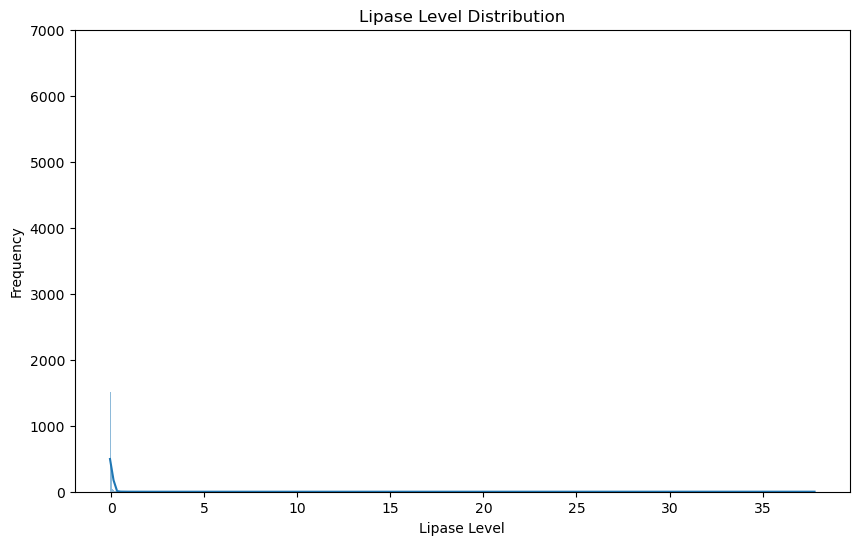

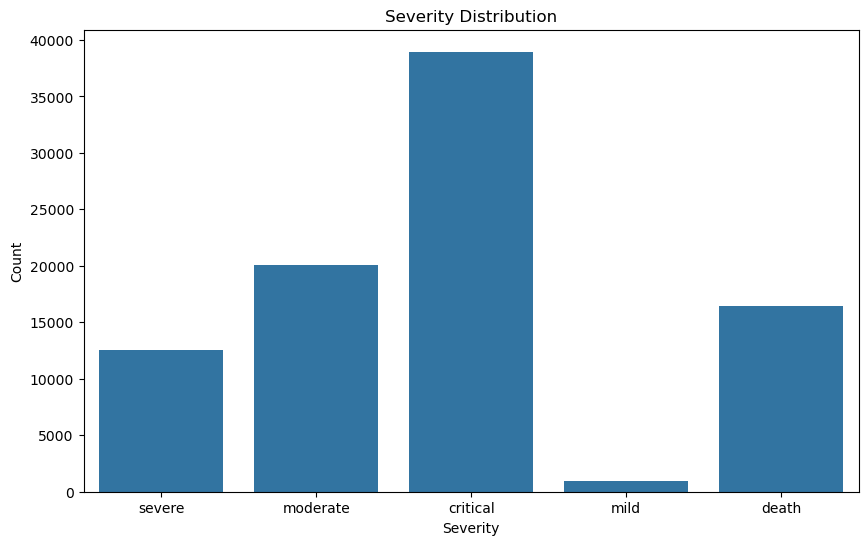

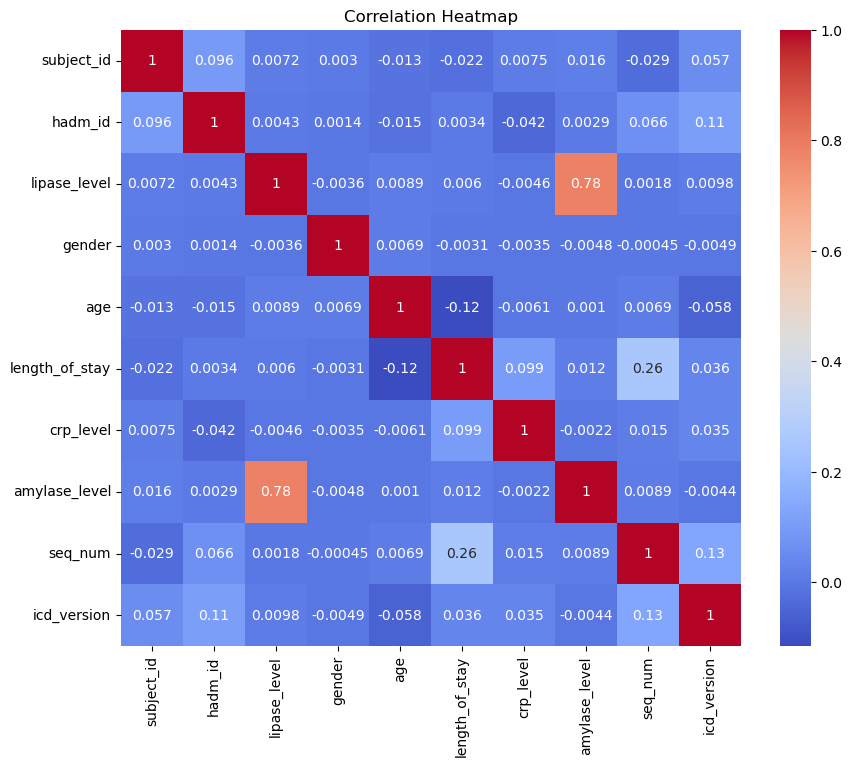

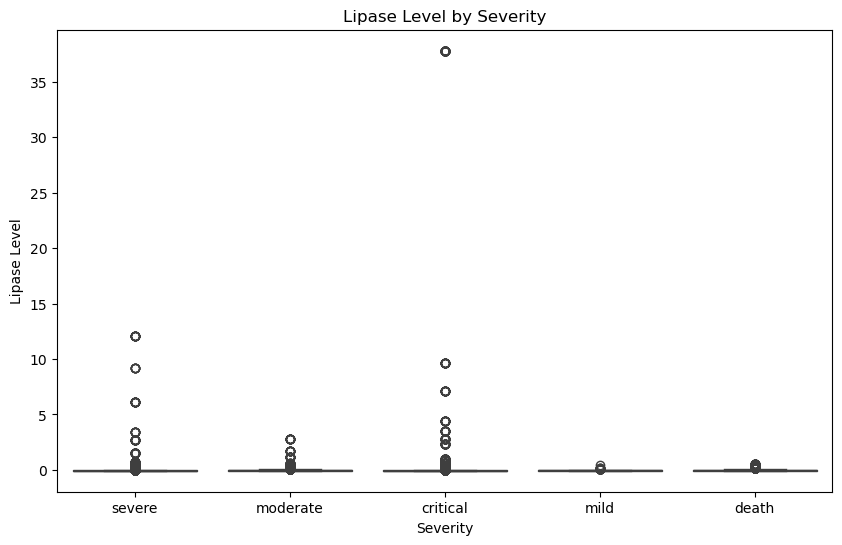

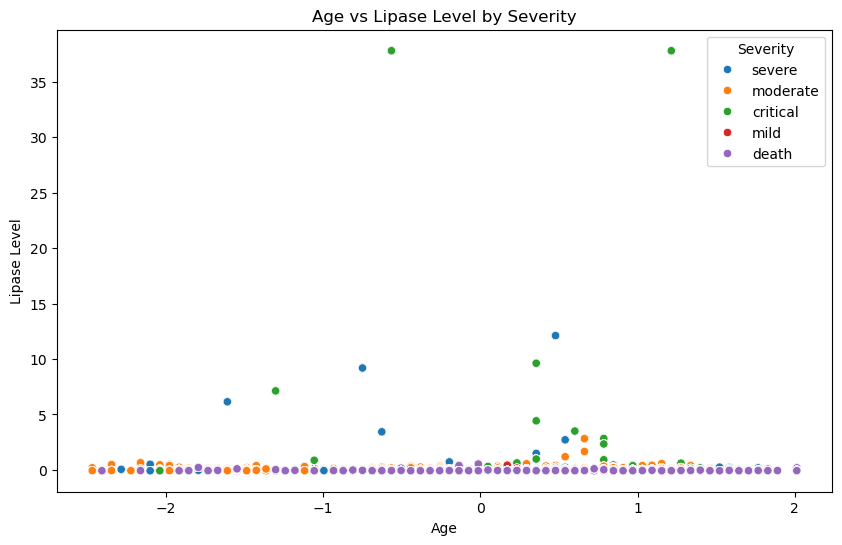

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler



# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values by filling or dropping
# Example: Filling 'crp_level' and 'amylase_level' columns with median values
df['crp_level'].fillna(df['crp_level'].median(), inplace=True)
df['amylase_level'].fillna(df['amylase_level'].median(), inplace=True)

# Convert datetime columns to proper datetime format
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')
df['admittime'] = pd.to_datetime(df['admittime'], errors='coerce')
df['dischtime'] = pd.to_datetime(df['dischtime'], errors='coerce')

# # Create a new column 'stay_duration' to calculate the hospital stay length in days
# df['stay_duration'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / (24 * 3600)  # Convert to days

# Encode categorical variables
# Map 'gender' column: F -> 0, M -> 1
# Randomly assign 0 or 1 to missing values


# Map 'gender' column: F -> 0, M -> 1
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# Randomly assign 0 or 1 to missing values
missing_mask = df['gender'].isna()  # Create a mask for missing values
num_missing = missing_mask.sum()  # Count the number of missing values

# Fill NaNs with random choices for only those entries
df.loc[missing_mask, 'gender'] = np.random.choice([0, 1], size=num_missing)

# One-hot encode 'race' column (creates a binary column for each race type)
# df = pd.get_dummies(df, columns=['race'], drop_first=True)

# Feature scaling for numeric columns using StandardScaler
# This scales the selected numeric columns to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df[['lipase_level', 'age']] = scaler.fit_transform(df[['lipase_level', 'age']])

# Exploratory Data Analysis (EDA) - Univariate Analysis

# Plot distribution of a continuous variable, e.g., 'lipase_level'
plt.figure(figsize=(10, 6))
sns.histplot(df['lipase_level'], kde=True)
plt.title('Lipase Level Distribution')
plt.xlabel('Lipase Level')
plt.ylabel('Frequency')
plt.show()

# Plot count of a categorical variable, e.g., 'severity'
plt.figure(figsize=(10, 6))
sns.countplot(x='severity', data=df)
plt.title('Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (EDA) - Multivariate Analysis

# Correlation Heatmap
# First, select only numeric columns to avoid issues with non-numeric data in correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Handle any remaining missing values in numeric_df by filling them with median values
numeric_df = numeric_df.fillna(numeric_df.median())

# Generate a heatmap of the correlation matrix for the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Relationship between severity and continuous variable, e.g., 'lipase_level'
plt.figure(figsize=(10, 6))
sns.boxplot(x='severity', y='lipase_level', data=df)
plt.title('Lipase Level by Severity')
plt.xlabel('Severity')
plt.ylabel('Lipase Level')
plt.show()

# Scatter plot to analyze relationships between two variables with severity as a hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='lipase_level', hue='severity', data=df)
plt.title('Age vs Lipase Level by Severity')
plt.xlabel('Age')
plt.ylabel('Lipase Level')
plt.legend(title='Severity')
plt.show()


In [40]:
df.head()

,subject_id,hadm_id,charttime,lipase_level,admittime,dischtime,gender,age,race,in_hospital_death,length_of_stay,charttime_crp,crp_level,charttime_amylase,amylase_level,is_confirmed_ap,icd_code,seq_num,icd_version,severity
0,10004606,29242151.0,2159-02-20 18:30:00,-0.044243,2159-02-20 13:43:00,2159-03-06 16:51:00,1.0,0.355612,WHITE,False,14.130556,NaN,166.0,NaN,1327.0,True,G40409,1.0,10.0,severe
1,10004606,29242151.0,2159-02-20 18:30:00,-0.044243,2159-02-20 13:43:00,2159-03-06 16:51:00,0.0,0.355612,WHITE,False,14.130556,NaN,166.0,NaN,1327.0,True,K8510,2.0,10.0,severe
2,10004606,29242151.0,2159-02-20 18:30:00,-0.044243,2159-02-20 13:43:00,2159-03-06 16:51:00,0.0,0.355612,WHITE,False,14.130556,NaN,166.0,NaN,1327.0,True,G9340,3.0,10.0,severe
3,10004606,29242151.0,2159-02-20 18:30:00,-0.044243,2159-02-20 13:43:00,2159-03-06 16:51:00,0.0,0.355612,WHITE,False,14.130556,NaN,166.0,NaN,1327.0,True,K8064,4.0,10.0,severe
4,10004606,29242151.0,2159-02-20 18:30:00,-0.044243,2159-02-20 13:43:00,2159-03-06 16:51:00,1.0,0.355612,WHITE,False,14.130556,NaN,166.0,NaN,1327.0,True,E871,5.0,10.0,severe


In [41]:
# Import necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler




# Selecting numeric columns only for VIF calculation
numeric_df = df.select_dtypes(include=[float, int])

# Handle missing values by filling them with the median (optional, based on your dataset's characteristics)
numeric_df = numeric_df.fillna(numeric_df.median())

# Standardize numeric features before calculating VIF to improve numerical stability
scaler = StandardScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)
print(scaled_numeric_df.isna().sum())

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = scaled_numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(scaled_numeric_df.values, i) for i in range(scaled_numeric_df.shape[1])]

# Display VIF values
print(vif_data)


subject_id        0
hadm_id           0
lipase_level      0
gender            0
age               0
length_of_stay    0
crp_level         0
amylase_level     0
seq_num           0
icd_version       0
dtype: int64
          feature       VIF
0      subject_id  1.014178
1         hadm_id  1.026595
2    lipase_level  2.591527
3          gender  1.000121
4             age  1.019162
5  length_of_stay  1.098524
6       crp_level  1.013532
7   amylase_level  2.592062
8         seq_num  1.095800
9     icd_version  1.036728


In [42]:
df.drop(['length_of_stay','race'], axis=1, inplace=True)

In [43]:
df.to_csv('AP_ICD_Lipase_CRP_Amylase_Dataset_Comorbid_Clean.csv', index=False)